In [1]:
import pandas as pd

fsensor="/scratch/ICE-CUBE/sensor_geometry.csv"
fbatch={'1':"/scratch/ICE-CUBE/batch_1.parquet"}
fmeta="/scratch/ICE-CUBE/train_meta.parquet"

In [2]:
sensorgeom = pd.read_csv(fsensor).set_index("sensor_id").to_dict()
batch= pd.read_parquet(fbatch['1']).query("(event_id%100==0) & (auxiliary==False)")

In [3]:
#Map x,y,z to sensor_id in batch

def getx(sensorid):
    return sensorgeom['x'][sensorid]
def gety(sensorid):
    return sensorgeom['y'][sensorid]
def getz(sensorid):
    return sensorgeom['z'][sensorid]

batch['x']=batch['sensor_id'].apply(getx)
batch['y']=batch['sensor_id'].apply(gety)
batch['z']=batch['sensor_id'].apply(getz)

In [4]:
batch.head()

,sensor_id,time,charge,auxiliary,x,y,z
event_id,,,,,,,
2800,1154,9873,0.875,False,326.85,-209.07,260.13
2800,1155,10003,0.775,False,326.85,-209.07,243.11
2800,1157,10041,1.025,False,326.85,-209.07,209.07
2800,1156,10100,0.225,False,326.85,-209.07,226.09
2800,1160,10349,1.275,False,326.85,-209.07,158.01


array([[<AxesSubplot:title={'center':'sensor_id'}>]], dtype=object)

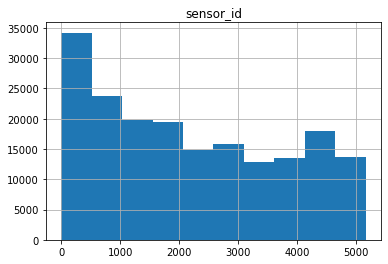

In [5]:
batch.hist("sensor_id")

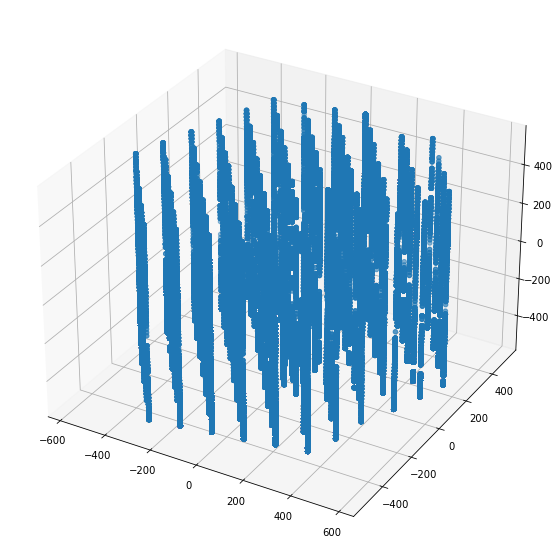

In [14]:
import matplotlib.pyplot as plt
threedee = plt.figure(figsize=(10, 10)).gca(projection='3d')
threedee.scatter(batch['x'],batch['y'],batch['z'])
plt.show()


In [102]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


def plot_events(batch,events):
    fig, axes = plt.subplots(nrows=1, ncols=len(events), subplot_kw={'projection': '3d'},figsize=(25,5))
    axes=axes.flatten()
    for i, ax in enumerate(axes):
        ax.scatter(batch.loc[events[i]]['x'],batch.loc[events[i]]['y'],batch.loc[events[i]]['z'])
    plt.show()

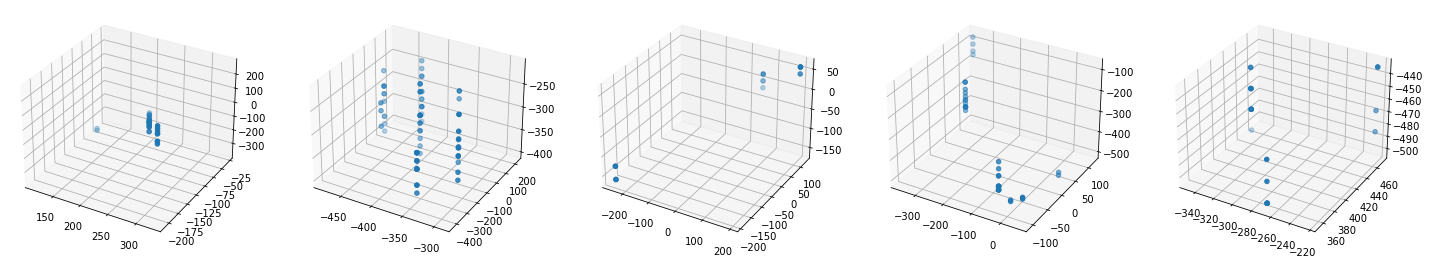

In [103]:
plot_events(batch,list(batch.index.unique())[:5])
